In [1]:
import pandas as pd
import numpy as np

#### Aim:- to predict the price range of the mobile

In [2]:
trf = pd.read_csv(r"C:\Users\HARSH\Desktop\python dataset\trainRF.csv")

#### Create a Dataframe from the given data, perform basic EDA and check if data cleaning is required

In [5]:
trf.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
pd.set_option('display.max_columns',None)

In [6]:
trf.shape

(2000, 21)

In [9]:
trf.isnull().sum()[trf.isnull().sum()>0]

Series([], dtype: int64)

In [13]:
# Checking Statistical Summary
# object columns
trf.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


#### EDA :-

In [15]:
import cufflinks as cf
import plotly 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [26]:
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
init_notebook_mode(connected= True)   ### to connect to notebook
cf.go_offline()

In [14]:
trf.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

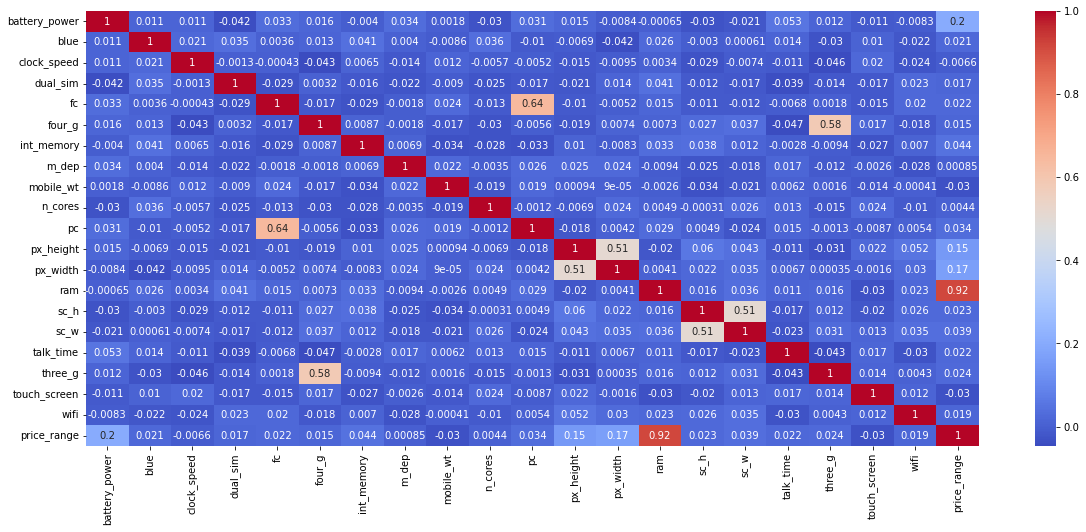

In [18]:
plt.figure(figsize=(20,8))
sns.heatmap(trf.corr(), annot=True , cmap='coolwarm')

In [19]:
trf.price_range.unique()

array([1, 2, 3, 0], dtype=int64)

In [24]:
trf.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [38]:
trf.clock_speed.unique()

array([2.2, 0.5, 2.5, 1.2, 1.7, 0.6, 2.9, 2.8, 2.1, 1. , 0.9, 1.1, 2.6,
       1.4, 1.6, 2.7, 1.3, 2.3, 2. , 1.8, 3. , 1.5, 1.9, 2.4, 0.8, 0.7])

In [29]:
trf.iplot(x = 'price_range' , y='battery_power' , kind='bar' , mode='markers' , 
          xTitle='price_range',yTitle='battery_power' )

In [32]:
trf.iplot(x = 'price_range' , y='ram' , kind='bar' , mode='markers' , 
          xTitle='price_range',yTitle='ram' )

In [33]:
trf.iplot(x = 'price_range' , y='int_memory' , kind='bar' , mode='markers' , 
          xTitle='price_range',yTitle='int_memory' )

In [39]:
trf.iplot( kind='box' , title='boxplot')

In [40]:
trf.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
sns.pointplot

<AxesSubplot:xlabel='price_range', ylabel='ram'>

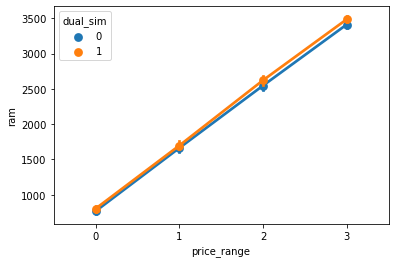

In [44]:
sns.pointplot(x='price_range' , y='ram' , data=trf , hue='dual_sim')

<AxesSubplot:xlabel='price_range', ylabel='clock_speed'>

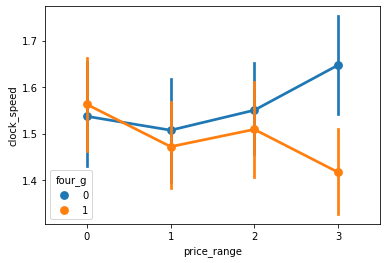

In [45]:
sns.pointplot(x='price_range' , y='clock_speed' , hue='four_g' , data=trf)

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

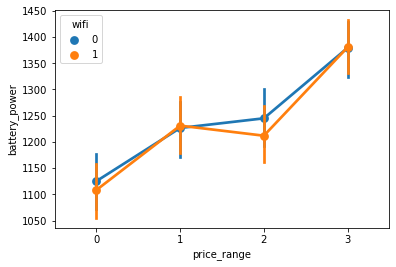

In [49]:
sns.pointplot(x='price_range' , y='battery_power' , hue='wifi' , data=trf)

<AxesSubplot:xlabel='price_range', ylabel='mobile_wt'>

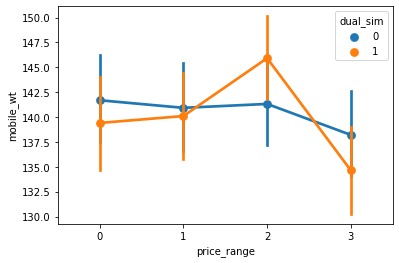

In [52]:
sns.pointplot(x='price_range' , y='mobile_wt' , hue='dual_sim' , data=trf)

In [ ]:
sns.pointplot(x='price_range' , y='mobile_wt' , hue='dual_sim' , data=trf)

C:\Users\HARSH\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



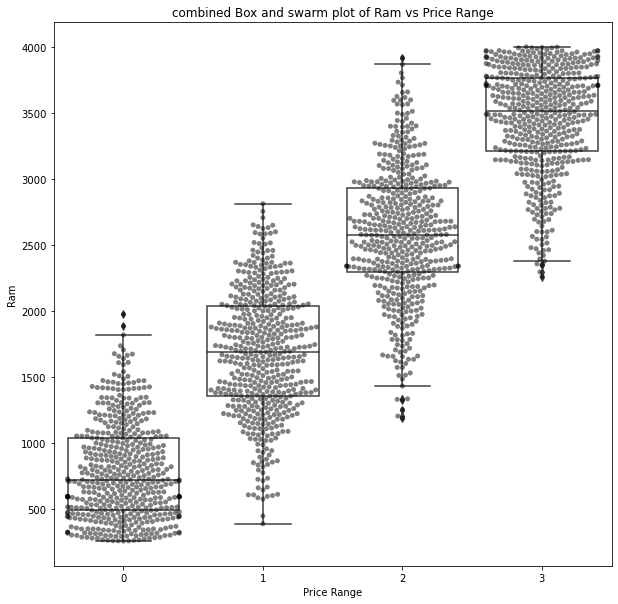

In [64]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'price_range' , y='ram' , data=trf , showcaps = True , boxprops = {'facecolor':'None'} )
sns.swarmplot(x='price_range' , y = 'ram', data=trf ,color='k', alpha=0.5 )
plt.title('combined Box and swarm plot of Ram vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Ram')
plt.show()

C:\Users\HARSH\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



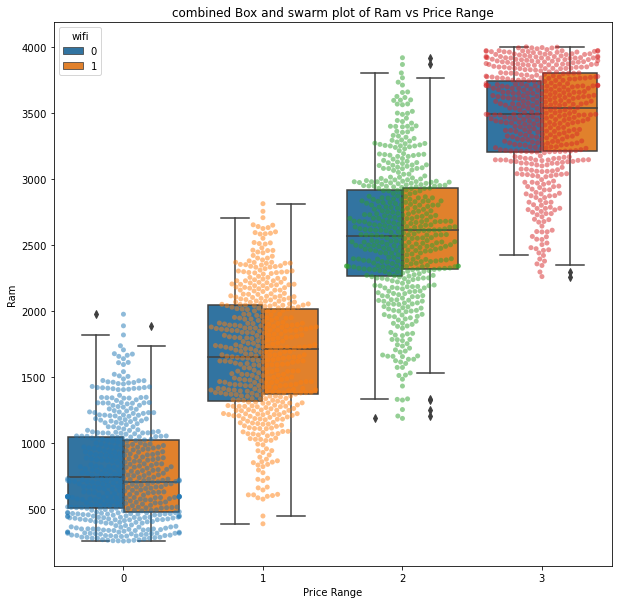

In [68]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'price_range' , y='ram' , data=trf , showcaps = True , hue='wifi' )
sns.swarmplot(x='price_range' , y = 'ram', data=trf, alpha=0.5 )
plt.title('combined Box and swarm plot of Ram vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Ram')
plt.show()

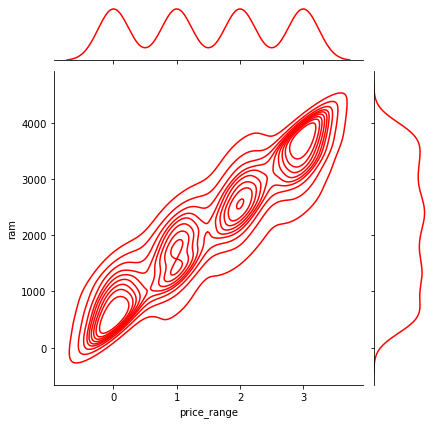

In [70]:
sns.jointplot(x='price_range',y='ram',data=trf,color='red',kind='kde')

In [72]:
trf.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1


In [275]:
trf = pd.read_csv(r"C:\Users\HARSH\Desktop\python dataset\trainRF.csv")

In [282]:
#  RFE Feature importance line :----->>feature imp line:_
trf= trf.loc[:,l1_rfe]

#### Sampling Stage:-

In [283]:
from sklearn.model_selection import train_test_split

In [284]:
trf_train , trf_test = train_test_split(trf , test_size=0.20 , random_state=2911)


#-------------------------------------------------------------------------------------





#-----------------------------------------------------------------------------------

trf_train_x = trf_train.iloc[ :  , :-1   ]
trf_train_y = trf_train.iloc[  :   ,   -1    ]


#------------------------------------------------------------------------------------
trf_test_x = trf_test.iloc[ :  , :-1   ]
trf_test_y = trf_test.iloc[  :   ,   -1    ]


In [285]:
# # Line for SMOTE Technique:--
#trf_train_x , trf_train_y = trf_train_x_resampled, trf_train_y_resampled 

#### Model Building:--

#### Logistic Regression:--

In [286]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(trf_train_x , trf_train_y)
pred_logreg = logreg.predict(trf_test_x)

C:\Users\HARSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [287]:
from sklearn.metrics import *

In [288]:
# building confusion matrix :--

tab_logreg = confusion_matrix(trf_test_y , pred_logreg)
tab_logreg = pd.DataFrame(tab_logreg)
tab_logreg.columns = ['Low' , 'Med','High','Premium' ]
tab_logreg.index =['Low' , 'Med','High','Premium' ]
tab_logreg

,Low,Med,High,Premium
Low,84,17,0,0
Med,21,60,20,3
High,0,14,41,31
Premium,0,2,18,89


In [289]:
print(classification_report(trf_test_y , pred_logreg))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       101
           1       0.65      0.58      0.61       104
           2       0.52      0.48      0.50        86
           3       0.72      0.82      0.77       109

    accuracy                           0.69       400
   macro avg       0.67      0.68      0.67       400
weighted avg       0.68      0.69      0.68       400



#### feature importance :---

In [87]:
import scipy
from scipy.stats import chi2_contingency

In [89]:
pvalue_list = []
for i in trf_train_x.columns:
    tab = pd.crosstab(trf_train_x[i] , trf_train_y)
    pvalue = chi2_contingency(tab)[1]
    pvalue_list.append(pvalue)

In [90]:
feat_imp = pd.DataFrame()
feat_imp['Features']= trf_train_x.columns
feat_imp['Importance'] = pvalue_list
feat_imp = feat_imp.sort_values('Importance')
feat_imp[feat_imp.Importance <= 0.05]

,Features,Importance
13,ram,0.000001


#### Decision Tree:-

In [ ]:
trf = pd.read_csv(r"C:\Users\HARSH\Desktop\python dataset\trainRF.csv")

In [ ]:
trf_train , trf_test = train_test_split(trf , test_size=0.20 , random_state=2911)


#-------------------------------------------------------------------------------------





#-----------------------------------------------------------------------------------

trf_train_x = trf_train.iloc[ :  , :-1   ]
trf_train_y = trf_train.iloc[  :   ,   -1    ]


#------------------------------------------------------------------------------------
trf_test_x = trf_test.iloc[ :  , :-1   ]
trf_test_y = trf_test.iloc[  :   ,   -1    ]


In [98]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5 , min_samples_split=25 , class_weight='balanced')

In [99]:
dt.fit(trf_train_x ,trf_train_y)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_split=25)

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
# search_dict = {'criterion':['gini','entropy'] , 
#                'max_depth':range(5,10) , 
#                 'min_samples_split':range(25,30)}

In [95]:
# grid = GridSearchCV(dt , param_grid=search_dict)

In [96]:
# grid.fit(trf_train_x , trf_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 10),
                         'min_samples_split': range(25, 30)})

In [97]:
grid.best_params_ 

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 25}

In [100]:
pred_test_dt = dt.predict(trf_test_x)

In [101]:
# building confusion matrix :--

tab_dt = confusion_matrix(trf_test_y , pred_test_dt)
tab_dt = pd.DataFrame(tab_dt)
tab_dt.columns = ['Low' , 'Med','High','Premium' ]
tab_dt.index =['Low' , 'Med','High','Premium' ]
tab_dt

,Low,Med,High,Premium
Low,94,7,0,0
Med,11,91,2,0
High,0,14,60,12
Premium,0,0,14,95


In [102]:
print(classification_report(trf_test_y , pred_test_dt))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       101
           1       0.81      0.88      0.84       104
           2       0.79      0.70      0.74        86
           3       0.89      0.87      0.88       109

    accuracy                           0.85       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.85      0.85       400



#### Adaboost:--

In [103]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(dt )

In [104]:
abc.fit(trf_train_x,trf_train_y)
abc_pred = abc.predict(trf_test_x)

In [105]:
# building confusion matrix :--

tab_abc = confusion_matrix(trf_test_y , abc_pred)
tab_abc = pd.DataFrame(tab_dt)
tab_abc.columns = ['Low' , 'Med','High','Premium' ]
tab_abc.index =['Low' , 'Med','High','Premium' ]
tab_abc

,Low,Med,High,Premium
Low,94,7,0,0
Med,11,91,2,0
High,0,14,60,12
Premium,0,0,14,95


In [106]:
print(classification_report(trf_test_y , abc_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       101
           1       0.85      0.93      0.89       104
           2       0.73      0.93      0.82        86
           3       0.99      0.78      0.87       109

    accuracy                           0.88       400
   macro avg       0.89      0.88      0.88       400
weighted avg       0.90      0.88      0.88       400



#### XGBoost Classifier :--

In [176]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(trf_train_x , trf_train_y)
pred_xgb = xgb.predict(trf_test_x)

In [177]:
# building confusion matrix :--

tab_xgb = confusion_matrix(trf_test_y , pred_xgb)
tab_xgb = pd.DataFrame(tab_xgb)
tab_xgb.columns = ['Low' , 'Med','High','Premium' ]
tab_xgb.index =['Low' , 'Med','High','Premium' ]
tab_xgb

,Low,Med,High,Premium
Low,98,3,0,0
Med,5,96,3,0
High,0,3,78,5
Premium,0,0,15,94


In [178]:
print(classification_report(trf_test_y , pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       101
           1       0.94      0.92      0.93       104
           2       0.81      0.91      0.86        86
           3       0.95      0.86      0.90       109

    accuracy                           0.92       400
   macro avg       0.91      0.92      0.91       400
weighted avg       0.92      0.92      0.92       400



#### Random Forest:---

In [108]:
trf = pd.read_csv(r"C:\Users\HARSH\Desktop\python dataset\trainRF.csv")

In [118]:
# feature imp line:-#### this line should be just before sampling stage 
trf = trf.loc[:,l1_rfc]

In [119]:
trf_train , trf_test = train_test_split(trf , test_size=0.20 , random_state=2911)


#-------------------------------------------------------------------------------------





#-----------------------------------------------------------------------------------

trf_train_x = trf_train.iloc[ :  , :-1   ]
trf_train_y = trf_train.iloc[  :   ,   -1    ]


#------------------------------------------------------------------------------------
trf_test_x = trf_test.iloc[ :  , :-1   ]
trf_test_y = trf_test.iloc[  :   ,   -1    ]


In [120]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')

In [121]:
rfc.fit(trf_train_x ,trf_train_y)

RandomForestClassifier(class_weight='balanced')

In [122]:
pred_rfc = rfc.predict(trf_test_x)

In [123]:
# building confusion matrix :--

tab_rfc = confusion_matrix(trf_test_y , pred_rfc)
tab_rfc = pd.DataFrame(tab_rfc)
tab_rfc.columns = ['Low' , 'Med','High','Premium' ]
tab_rfc.index =['Low' , 'Med','High','Premium' ]
tab_rfc

,Low,Med,High,Premium
Low,98,3,0,0
Med,12,90,2,0
High,0,5,78,3
Premium,0,0,14,95


In [124]:
print(classification_report(trf_test_y , pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       101
           1       0.92      0.87      0.89       104
           2       0.83      0.91      0.87        86
           3       0.97      0.87      0.92       109

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.90      0.90       400



In [115]:
feat_imp_rfc = pd.DataFrame()
feat_imp_rfc['features'] = trf_train_x.columns
feat_imp_rfc['imp'] = rfc.feature_importances_
feat_imp_rfc = feat_imp_rfc.sort_values('imp',ascending=False)
feat_imp_rfc

,features,imp
13,ram,0.483191
0,battery_power,0.078214
12,px_width,0.055646
11,px_height,0.055076
8,mobile_wt,0.038398
6,int_memory,0.035219
16,talk_time,0.031472
10,pc,0.029780
14,sc_h,0.028828
2,clock_speed,0.028210


In [117]:
l1_rfc = list(feat_imp_rfc.features[0:10])
l1_rfc.append('price_range')
l1_rfc

['ram',
 'battery_power',
 'px_width',
 'px_height',
 'mobile_wt',
 'int_memory',
 'talk_time',
 'pc',
 'sc_h',
 'clock_speed',
 'price_range']

#### Naive Bayes :--

In [126]:
trf = pd.read_csv(r"C:\Users\HARSH\Desktop\python dataset\trainRF.csv")

In [127]:
trf_train , trf_test = train_test_split(trf , test_size=0.20 , random_state=2911)


#-------------------------------------------------------------------------------------





#-----------------------------------------------------------------------------------

trf_train_x = trf_train.iloc[ :  , :-1   ]
trf_train_y = trf_train.iloc[  :   ,   -1    ]


#------------------------------------------------------------------------------------
trf_test_x = trf_test.iloc[ :  , :-1   ]
trf_test_y = trf_test.iloc[  :   ,   -1    ]


In [129]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(trf_train_x ,trf_train_y)

MultinomialNB()

In [130]:
pred_nb = nb.predict(trf_test_x)

In [131]:
# building confusion matrix :--

tab_nb = confusion_matrix(trf_test_y , pred_nb)
tab_nb = pd.DataFrame(tab_nb)
tab_nb.columns = ['Low' , 'Med','High','Premium' ]
tab_nb.index =['Low' , 'Med','High','Premium' ]
tab_nb

,Low,Med,High,Premium
Low,76,23,1,1
Med,38,36,19,11
High,2,22,22,40
Premium,0,11,30,68


In [133]:
print(classification_report(trf_test_y , pred_nb))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       101
           1       0.39      0.35      0.37       104
           2       0.31      0.26      0.28        86
           3       0.57      0.62      0.59       109

    accuracy                           0.51       400
   macro avg       0.48      0.49      0.49       400
weighted avg       0.49      0.51      0.49       400



#### KNN:--

In [223]:
trf = pd.read_csv(r"C:\Users\HARSH\Desktop\python dataset\trainRF.csv")

In [224]:
trf_train , trf_test = train_test_split(trf , test_size=0.20 , random_state=2911)


#-------------------------------------------------------------------------------------





#-----------------------------------------------------------------------------------

trf_train_x = trf_train.iloc[ :  , :-1   ]
trf_train_y = trf_train.iloc[  :   ,   -1    ]


#------------------------------------------------------------------------------------
trf_test_x = trf_test.iloc[ :  , :-1   ]
trf_test_y = trf_test.iloc[  :   ,   -1    ]


In [225]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(trf_train_x,trf_train_y)

KNeighborsClassifier(n_neighbors=40)

In [226]:
pred_knn = knn.predict(trf_test_x)

In [227]:
# building confusion matrix :--

tab_knn = confusion_matrix(trf_test_y , pred_knn)
tab_knn = pd.DataFrame(tab_knn)
tab_knn.columns = ['Low' , 'Med','High','Premium' ]
tab_knn.index =['Low' , 'Med','High','Premium' ]
tab_knn

,Low,Med,High,Premium
Low,99,2,0,0
Med,11,90,3,0
High,0,4,78,4
Premium,0,0,8,101


In [228]:
print(classification_report(trf_test_y , pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       101
           1       0.94      0.87      0.90       104
           2       0.88      0.91      0.89        86
           3       0.96      0.93      0.94       109

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [141]:
# code for graph to find the value of neighbors:-

In [144]:
acc = []
for k in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(trf_train_x , trf_train_y)
    pred_knn = knn.predict(trf_test_x)
    tab_knn = confusion_matrix(trf_test_y, pred_knn)
    acc.append(tab_knn.diagonal().sum()/ tab_knn.sum())
#     print(k)

In [145]:
l1 = list(range(1,51))

Text(0, 0.5, 'Accuracy')

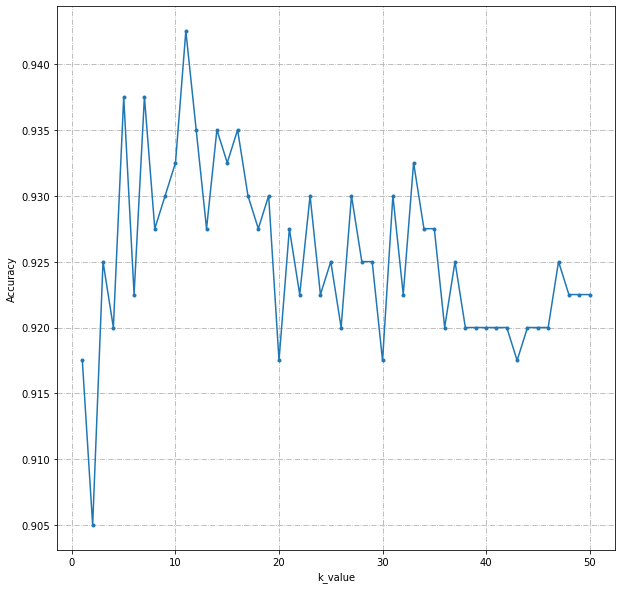

In [146]:
plt.figure(figsize=(10,10))
plt.plot(l1 , acc , marker = '.')
plt.grid(linestyle='-.')
plt.xlabel('k_value')
plt.ylabel('Accuracy')

#### SVM:--

In [153]:
trf = pd.read_csv(r"C:\Users\HARSH\Desktop\python dataset\trainRF.csv")

In [154]:
trf_train , trf_test = train_test_split(trf , test_size=0.20 , random_state=2911)


#-------------------------------------------------------------------------------------





#-----------------------------------------------------------------------------------

trf_train_x = trf_train.iloc[ :  , :-1   ]
trf_train_y = trf_train.iloc[  :   ,   -1    ]


#------------------------------------------------------------------------------------
trf_test_x = trf_test.iloc[ :  , :-1   ]
trf_test_y = trf_test.iloc[  :   ,   -1    ]


In [170]:
from sklearn.svm import SVC
svc= SVC(class_weight='balanced' , kernel='poly', degree=4)
svc.fit(trf_train_x , trf_train_y)
pred_svc = svc.predict(trf_test_x)

In [171]:
# building confusion matrix :--

tab_svc = confusion_matrix(trf_test_y , pred_svc)
tab_svc = pd.DataFrame(tab_svc)
tab_svc.columns = ['Low' , 'Med','High','Premium' ]
tab_svc.index =['Low' , 'Med','High','Premium' ]
tab_svc

,Low,Med,High,Premium
Low,101,0,0,0
Med,6,98,0,0
High,0,2,84,0
Premium,0,0,2,107


In [172]:
print(classification_report(trf_test_y , pred_svc))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       101
           1       0.98      0.94      0.96       104
           2       0.98      0.98      0.98        86
           3       1.00      0.98      0.99       109

    accuracy                           0.97       400
   macro avg       0.98      0.98      0.97       400
weighted avg       0.98      0.97      0.97       400



#### Feature selection Techniques applied :--

#### RFE :-

In [231]:
x = trf.iloc[: , :-1]
y = trf.iloc[: , -1]

In [232]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg , n_features_to_select= 10)
rfe.fit(x,y) 

C:\Users\HARSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\HARSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\HARSH\anaconda3\lib\site-packages

RFE(estimator=LogisticRegression(class_weight='balanced'),
    n_features_to_select=10)

In [233]:
rfe.support_

array([False, False,  True, False,  True, False,  True, False,  True,
        True,  True, False, False,  True,  True,  True,  True, False,
       False, False])

In [234]:
# now lets create df
feat_imp_rfe = pd.DataFrame()
feat_imp_rfe['features'] = x.columns
feat_imp_rfe['imp'] = rfe.support_

In [235]:
feat_imp_rfe = feat_imp_rfe[feat_imp_rfe.imp == True]
feat_imp_rfe

,features,imp
2,clock_speed,True
4,fc,True
6,int_memory,True
8,mobile_wt,True
9,n_cores,True
10,pc,True
13,ram,True
14,sc_h,True
15,sc_w,True
16,talk_time,True


In [236]:
l1_rfe = list(feat_imp_rfe.features[:])
l1_rfe.append('price_range')
l1_rfe

['clock_speed',
 'fc',
 'int_memory',
 'mobile_wt',
 'n_cores',
 'pc',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'price_range']

#### Variance selection technique for feature selection :--

In [253]:
trf = pd.read_csv(r"C:\Users\HARSH\Desktop\python dataset\trainRF.csv")

In [246]:
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold()

In [247]:
var.fit(trf)

VarianceThreshold()

In [248]:
var.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [252]:
# Hence all the features are having some amount of variance and hence information gain .

#### Pickling the model :--

In [249]:
import pickle

In [250]:
with open('Train_rf_EDA_and_modelbuilding', 'wb') as f:
    pickle.dump(logreg , f)

In [251]:
with open('Train_rf_EDA_and_modelbuilding', 'rb') as f:
    loaded_model = pickle.load(f)

#### lets check for class imbalance (if any) and perform SMOTE (Synthetic Minority Oversampling Technique):--

In [254]:
trf = pd.read_csv(r"C:\Users\HARSH\Desktop\python dataset\trainRF.csv")

In [256]:
trf_x = trf.iloc[:,:-1]
trf_y = trf.iloc[:,-1]

In [257]:
trf_train_x , trf_test_x , trf_train_y , trf_test_y = train_test_split(trf_x , trf_y , test_size=0.20)

In [258]:
from imblearn.over_sampling import SMOTE

In [259]:
# just check for imbalance:-
trf_train_x.shape

(1600, 20)

In [262]:
trf_train_y.value_counts()

2    415
1    406
3    399
0    380
Name: price_range, dtype: int64

In [266]:
smt = SMOTE(sampling_strategy={2:1000,1:1000,3:1000,0:1000})

In [267]:
trf_train_x_resampled , trf_train_y_resampled =smt.fit_resample(trf_train_x , trf_train_y)

In [268]:
# just check if imbalance is taken care of :-
trf_train_x_resampled.shape

(4000, 20)

In [269]:
trf_train_y_resampled.value_counts()

1    1000
2    1000
0    1000
3    1000
Name: price_range, dtype: int64

In [291]:
# hence model is trained , but performs well on Decision Tree , Random Forest , Adaboost , XGBoostClassifier and KNN
# Model was trained best on SVM with kernel selected as polynomial and degree as 4 .